# scikit-learn Classification Template

Tech Check Loan Default Dataset Features¶
default: A factor with levels "No" and "Yes" indicating whether the customer defaulted on their debt.
student: A factor with levels "No" and "Yes" indicating whether the customer is a student.
balance: The average balance that the customer has remaining on their credit card after making their monthly payment.
income: The income of the customer.
You will be using the default value as your target feature for your model. Read the section title in your quiz for the complete instructions.

Here is your dataset:
https://raw.githubusercontent.com/psdbia/Class-Share/refs/heads/main/data/loan_defaults.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

## Import Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/psdbia/Class-Share/refs/heads/main/data/loan_defaults.csv')
df.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


## EDA

In [3]:
# check for nulls
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


(10000, 4)

In [5]:
# Convert any data type
# Convert object type to category type
df['default'] = df['default'].astype('category')
df['student'] = df['student'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


In [6]:
# Impute or delete any data as required

# none noted...

## EDA Visualizations

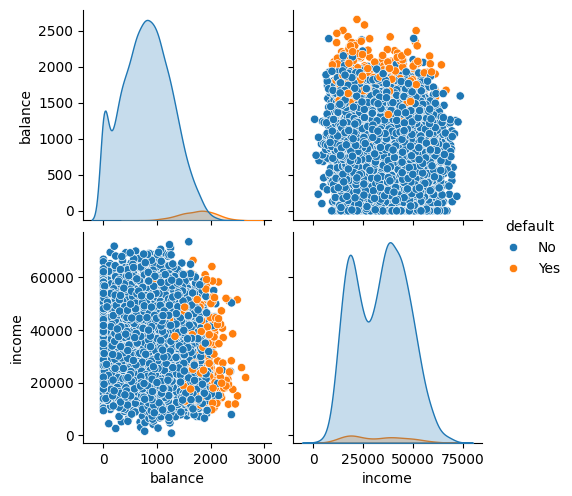

In [7]:
sns.pairplot(df, diag_kind='kde', hue='default');

## Prepare the X and y data

- Use one hot encoding for any object or categorical features
- Standardize / Normalize any numeric features

In [8]:
X = df.drop(columns=['default'])
y = df['default']

In [9]:
# one-hot encoding 
X = pd.get_dummies(X, drop_first=True)
X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,False
1,817.180407,12106.134700,True
2,1073.549164,31767.138947,False
3,529.250605,35704.493935,False
4,785.655883,38463.495879,False


In [10]:
# Scale the data after spliting for Train / Test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

scaler = StandardScaler()
scaler.fit(X_train) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Apply SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [12]:
X_train.shape, len(X_train_res)

((7000, 3), 13520)

In [13]:
y_train.value_counts()

default
No     6760
Yes     240
Name: count, dtype: int64

In [14]:
y_train_res.value_counts()

default
No     6760
Yes    6760
Name: count, dtype: int64

## Create the Model

In [15]:
mdl_selected = 'Logistic Regression'

In [16]:
mdl = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
mdl.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

## Predict y-hat

In [17]:
y_pred = mdl.predict(X_test)

## Probability

In [18]:
# probability scores... 
# I do this first as it's kinda my "thing" - many don't use probability scoring in their pipelines
y_proba = mdl.predict_proba(X_test)

# bring in just the probability of y_pred
res = pd.DataFrame({'y_true':y_test, 
              'y_pred':y_pred, 
              'proba': [max(proba) for proba in y_proba]
              })
res['match'] = np.where(res['y_true'] == res['y_pred'], 1, 0)

# report the "misses"
misses = res[res['match'] == 0]
miss_count = len(misses)

In [19]:
print(f'There are {miss_count} misses vs {len(y_test)} total.\n% Total Missed: {miss_count / len(y_test) * 100:.3f}%')

There are 378 misses vs 3000 total.
% Total Missed: 12.600%


In [20]:
misses.sort_values('proba', ascending = False).head()

,y_true,y_pred,proba,match
9873,No,Yes,0.998319,0
3976,No,Yes,0.997845,0
8781,No,Yes,0.989866,0
7709,No,Yes,0.986614,0
6994,No,Yes,0.985860,0


## Metrics for Classification

### Accuracy
The ratio of correctly predicted instances to the total instances.

In [21]:
# assigning y_test to variable y_true to help with clarity while learning...
y_true = y_test
y_pred = mdl.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f"The accuracy of the {mdl_selected} model: {accuracy:.2f}\nUnformated Value: {accuracy}")

The accuracy of the Logistic Regression model: 0.87
Unformated Value: 0.874


### Precision
The ratio of correctly predicted positive observations to the total predicted positives.

In [22]:
precision = precision_score(y_true, y_pred, average='weighted')
print(f"The precision of the {mdl_selected} model: {precision:.2f}\nUnformated Value: {precision}")

The precision of the Logistic Regression model: 0.97
Unformated Value: 0.9692227806464085


### Recall (Sensitivity)
The ratio of correctly predicted positive observations to all observations in the actual class.

In [23]:
recall = recall_score(y_true, y_pred, average='weighted')  # weighted
print(f"The recall of the {mdl_selected} model: {recall:.2f}\nUnformated Value: {recall}")

The recall of the Logistic Regression model: 0.87
Unformated Value: 0.874


### F1 Score 
The weighted average of Precision and Recall.


In [24]:
f1 = f1_score(y_true, y_pred, average='weighted') # weighted

print(f"The f1 of the {mdl_selected} model: {f1:.2f}\nUnformated Value: {recall}")

The f1 of the Logistic Regression model: 0.91
Unformated Value: 0.874


### Classification Report
A comprehensive report showing precision, recall, F1 score, and support for each class.

In [25]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.99      0.87      0.93      2907
         Yes       0.18      0.85      0.29        93

    accuracy                           0.87      3000
   macro avg       0.59      0.86      0.61      3000
weighted avg       0.97      0.87      0.91      3000



### Confusion Matrix
A table used to describe the performance of a classification model.

In [26]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[2543,  364],
       [  14,   79]], dtype=int64)

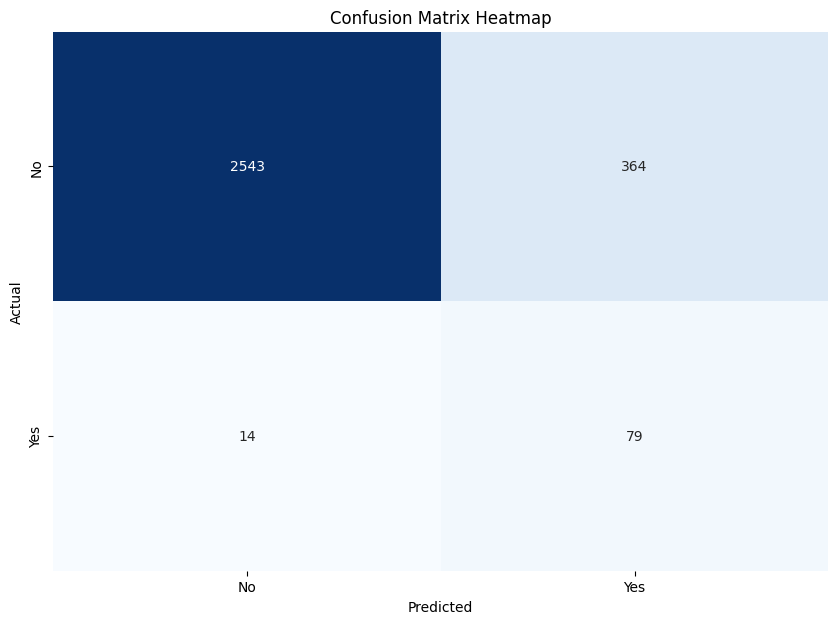

In [27]:
class_labels = ['No', 'Yes']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()